Ana Lyons  
101

# Homework 4: File I/O, Statistics

**Submit this notebook to bCourses to receive a grade for this Homework.**

Please complete homework activities in code cells in this iPython notebook. Be sure to comment your code well so that anyone who reads it can follow it and use it. Enter your name in the cell at the top of the notebook. When you are ready to submit it, you should download it as a python notebook (click "File", "Download as", "Notebook (.ipynb)") and upload it on bCourses under the Assignments tab.

For questions that ask you to make an interpretation, please write a sentence or two explaining your response. You can use "Markdown" language to create a cell (like this one) which is ordinary text instead of using code. To do this, create a new cell, and then look at the bar above which has a picture of a floppy disk. On the right side is a drop down menu that allows you change whether a cell is "Markdown" or "Code".

## Problem 1: Central Limit Theorem

Here we will verify the Central Limit Theorem and reproduced a plot I showed in class (https://en.wikipedia.org/wiki/Central_limit_theorem#/media/File:Dice_sum_central_limit_theorem.svg)

1. Write a function that returns $n$ integer random numbers, uniformly disributed between 1 and 6, inclusively. This represents $n$ throws of a fair 6-sided die. The value that comes up at each throw will be called the "score".
1. Generate a distribution of 1000 dice throws and plot it as a  histogram normalized to unit area. Compute the mean $\mu_1$ and standard deviation $\sigma_1$ of this distribution. Compare your numerical result to the analytical calculation. 
1. Generate 1000 sets of throws of $N=2,3,4,5,10$ dice, computing the total sum of dice scores for each set. For each value of $N$, plot the distribution of total scores, and compute the mean $\mu_N$ and standard deviation $\sigma_N$ of each distribution. This should be similar to the plot at the link above.
1. Plot the standard deviation $\sigma_N$ as a function of $N$. Does it follow the Central Limit Theorem? 

mean:3.5
standard deviation:1.6558985476169727
mean error: 0.0
standard deviation error: 0.2125228746429082

For N = 2
mean: 6.97
standard deviation: 2.399812492675209

For N = 3
mean: 10.489
standard deviation: 2.9346003135009715

For N = 4
mean: 13.767
standard deviation: 3.331772951447922

For N = 5
mean: 17.41
standard deviation: 3.784692854116434

For N = 10
mean: 35.058
standard deviation: 5.273958285766015

For N = 100
mean: 349.56
standard deviation: 17.43847470394128

For N = 1000
mean: 3500.023
standard deviation: 53.67180331421705



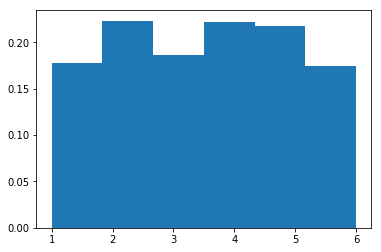

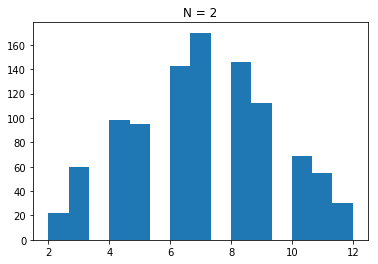

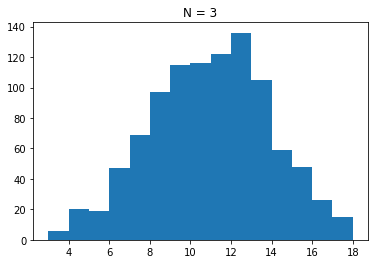

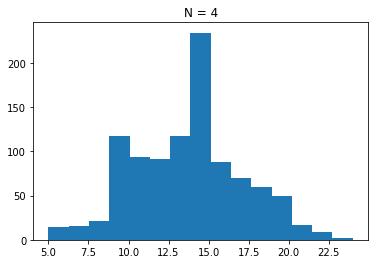

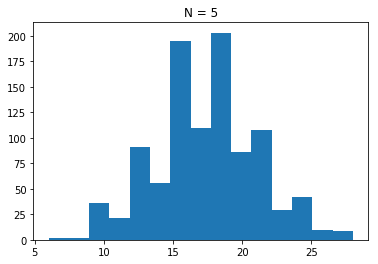

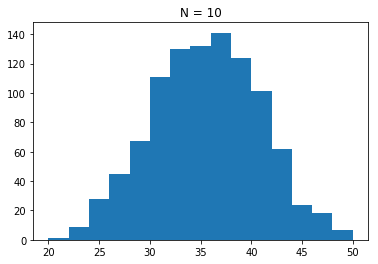

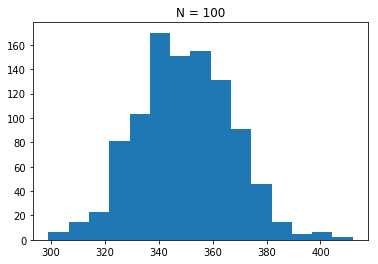

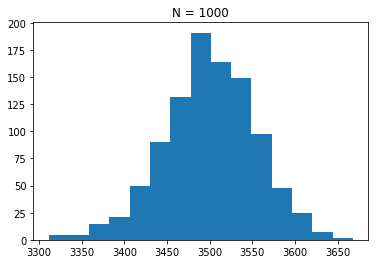

<Figure size 432x288 with 0 Axes>

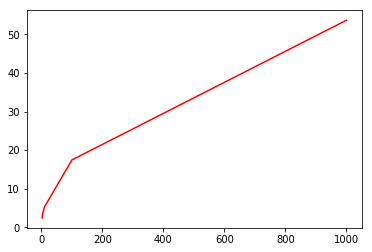

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

def six_die(n):
    '''Generates an array containing values for fair six sided die roll n times. 
    Input: int
    Output: array with size (1,n)'''
    score_arr = np.random.randint(1, 7, n)
    return score_arr

#histgram of 1000 dice throws
roll_1 = six_die(1000)
plt.hist(roll_1, 6, density=True)
mean1 = sp.mean(roll_1)
std1 = np.std(roll_1)    
print('mean:{}'.format(mean1))
print('standard deviation:{}'.format(std1))

#calculating/comparing numerical vs analytical values for mean and standard deviation
error_mean1 = abs(mean1 - ((6+1)/2))
error_std1 = abs(std1 - np.sqrt((6-1)**2/12))
print('mean error: {}'.format(error_mean1))
print('standard deviation error: {}\n'.format(error_std1))


def sum_score(N):
    '''For 1000 sets of throws of N six-sided die, returns the sum of all of the dice scores for each 
    set of throws.
    Input: integer
    Output: array of size (1, 1000)'''
    list_of_sums = []
    for m in range(1000):
        scores = six_die(N)
        list_of_scores = []
        for score in scores:
                list_of_scores.append(score)
        list_of_sums.append(np.sum(list_of_scores))
    return np.array(list_of_sums)


#plotting distribution of sums and mean/standard deviation for different N values
N_values = [2, 3, 4, 5, 10, 100, 1000]
stds = []
plt.figure()
for N in N_values:
    score_sums = sum_score(N)
    
    #plotting
    plt.hist(score_sums, 15)
    plt.title('N = {}'.format(N))
    plt.figure()
    
    #mean and standard deviation calculation
    mean = sp.mean(score_sums)
    std = np.std(score_sums)
    print('For N = {}'.format(N))
    print('mean: {}'.format(mean))
    print('standard deviation: {}\n'.format(std))
    stds.append(std)
    
    
#plotting the standard devations for different values of N vs N
plt.figure()
plt.plot(N_values, stds, 'r')
    



## Problem 2: Parity-Violating Asymmetry

The data sample for this problem comes from the <a href="http://www.slac.stanford.edu/exp/e158">E158</a> experiment at SLAC (a national lab near that Junior university across the Bay). E158 measured a parity-violating asymmetry in Møller (electron-electron) scattering. This was a fixed-target experiment, which scattered longitudinally-polarized electrons off atomic (unpolarized) electrons in the 1.5m liquid hydrogen target. The data below contains a snapshot of 10,000 "events" from this experiment (overall, the experiment collected almost 400 million such events over the course of about 4 months). Each event actually records a pair of pulses: one for the right-handed electron (spin pointing along momentum) and one for the left-handed electron. For each event, we record 4 variables:

* Counter: event index
* Asymmetry: "raw" cross section asymmetry $A_{raw}$ from one of the detector channels (there are 50 of these overall). The cross section asymmetry is defined as 
$A_{raw} = \frac{\sigma_R-\sigma_L}{\sigma_R+\sigma_L}$
The asymmetry is recorded in units of PPM (parts per million). It is called "raw" because corrections due to the difference in beam properties at the target are not yet applied.
* DeltaX: difference in beam position $\Delta X=X_R-X_L$ at the target in X direction in microns (with the convention that the beam is traveling along Z)
* DeltaY: difference in beam position $\Delta Y=Y_R-Y_L$ at the target in Y direction in microns

The data sample is provided in plain text format as the file <tt>asymdata.txt</tt>. Questions for this analysis:

1. Read the data from the file, and plot distributions of $A_{raw}$, $\Delta X$, and $\Delta Y$. 
1. Compute the mean of the raw asymmetry distribution and its statistical uncertainty.
1. Plot $A_{raw}$ vs $\Delta X$, $A_{raw}$ vs $\Delta Y$, and $\Delta X$ vs $\Delta Y$ as scatter plots. 
1. Compute the correlation coefficients <tt>Corr(Asym,DeltaX)</tt>, <tt>Corr(Asym,DeltaY)</tt>, and <tt>Corr(DeltaX,DeltaY)</tt>. See lecture notes, Workshop06 or https://en.wikipedia.org/wiki/Pearson_correlation_coefficient for additional help understanding correlation coefficients. Which variables are approximately independent of each other ?

Mean of Raw Asymmetry: 0.44301452999999963
Standard Deviation of Raw Asymmetry: 848.8533302673662
Corr(Asym, X): 0.05639276423703878
Corr(Asym, Y): 0.6475434676821319
Corr(X, Y): 0.4021285912819623
Because Corr(Asym, X) is very small, they are approximately independent.


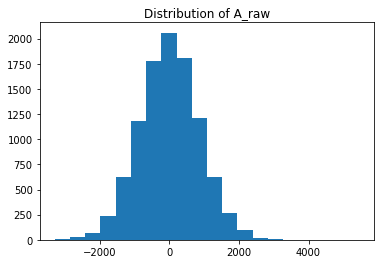

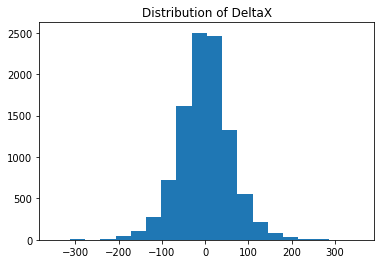

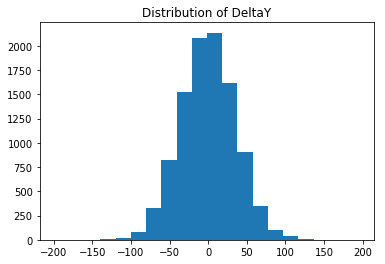

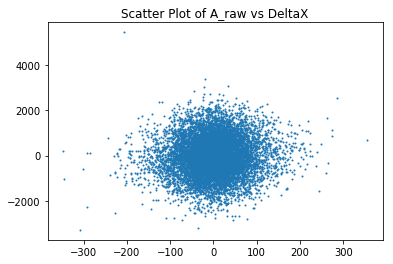

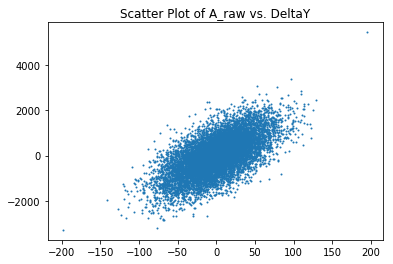

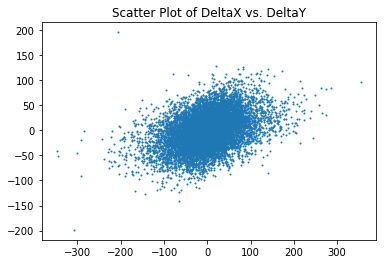

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

counter, A_raw, DeltaX, DeltaY = np.loadtxt('asymdata.txt', unpack = True, skiprows=1)

#plotting the histograms
plt.hist(A_raw, 20)
plt.title('Distribution of A_raw')
plt.figure()

plt.hist(DeltaX, 20)
plt.title('Distribution of DeltaX')
plt.figure()

plt.hist(DeltaY, 20)
plt.title('Distribution of DeltaY')
plt.figure()

#finding the mean and sigma for the A_raw
mean_A = sp.mean(A_raw)
std_A = np.std(A_raw)
print('Mean of Raw Asymmetry: {}\nStandard Deviation of Raw Asymmetry: {}'.format(mean_A, std_A))

#plotting and formatting the scatterplots for each relation
plt.scatter(DeltaX, A_raw, s=1)
plt.title("Scatter Plot of A_raw vs DeltaX")
plt.figure()
plt.scatter(DeltaY, A_raw, s=1)
plt.title("Scatter Plot of A_raw vs. DeltaY")
plt.figure()
plt.scatter(DeltaX, DeltaY, s=1)
plt.title('Scatter Plot of DeltaX vs. DeltaY')

#finding and printing the correlation coefficientsd
Corr_A_X = np.corrcoef(A_raw, DeltaX, rowvar=False)
Corr_A_Y = np.corrcoef(A_raw, DeltaY, rowvar=False)
Corr_X_Y = np.corrcoef(DeltaX, DeltaY, rowvar=False)

print('Corr(Asym, X): {}\nCorr(Asym, Y): {}\nCorr(X, Y): {}'.format(Corr_A_X[0,1], Corr_A_Y[0,1], Corr_X_Y[0,1]))
print('Because Corr(Asym, X) is very small, they are approximately independent.')


## Problem 3: Gamma-ray peak

[Some of you may recognize this problem from Advanced Lab's Error Analysis Exercise. That's not an accident.]

You are given a dataset (`peak.dat`) from a gamma-ray experiment consisting of ~1000 gamma-ray hits. Each line in the file corresponds to one recorded gamma-ray event, and stores the the measured energy of the gamma-ray (in MeV). We will assume that the energies are randomly distributed about a common mean, and that each event is uncorrelated to others. Read the dataset from the enclosed file and:
1. Produce a histogram of the distribution of energies. Choose the number of bins wisely, i.e. so that the width of each bin is smaller than the width of the peak, and at the same time so that the number of entries in the most populated bin is relatively large. Since this plot represents randomly-collected data, plotting error bars would be appropriate.
1. Compute the mean and standard deviation of the distribution of energies and their statistical uncertainties. Assume the distribution is Gaussian and see the lecture notes for the formulas for the mean and variance of the sample and the formulas for the errors on these quantities. 
1. Compute the fraction of events contained within $\pm 1\sigma$ of the mean, $\pm 2\sigma$ of the mean, and $\pm 3\sigma$ of the mean (where $\sigma$ is the standard deviation you computed in Part 2). Compare these fractions with the quantiles of the Gaussian distribution (see lecture notes) ? 



mean: 1.2028647099590764
uncertainty on the mean: 1.3334044440168879e-05
sigma: 0.10348184181629876
uncertainty on sigma: 6.817369907390009e-06

percentage of events within sigma of mean: 68.2%
percentage of events within 2*sigma of mean: 94.89999999999999%
percentage of events within 3*sigma of mean: 99.8%


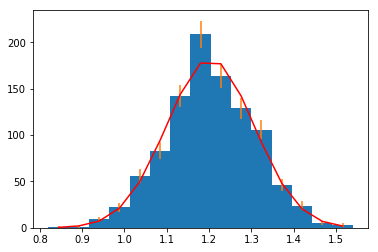

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm
import scipy.optimize as fitter
%matplotlib inline

data = np.loadtxt('peak.dat')

#creating a histogram of the data
#15 bins because otherwise there are bins without any counts, which causes problems w/ dividing by zero
B = 15
y, bins, patches = plt.hist(data, B)
       
#creating a list of the error for each bin count
error = []
for val in y:
    err = np.sqrt(val)
    error.append(err)

#creating a list of the bin centers
bin_centers = []
for n in range(0,B):
    bin_center = (bins[n+1] + bins[n])/2
    bin_centers.append(bin_center)
    
plt.errorbar(bin_centers, y, yerr=error, linestyle = 'None')

#fitting the histogram to a gaussian distribution
def model(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2*sigma**2))

par0 = np.array([sp.mean(data), np.std(data), 1])
par, cov = fitter.curve_fit(model, bin_centers, y, par0, error)

mu = par[0]
sigma = par[1]
A = par[2]
mu_err = cov[0,0]
sigma_err = cov[1,1]

plt.plot(bin_centers, model(bin_centers, mu, sigma, A), 'r-')
print('\nmean: {}\nuncertainty on the mean: {}\nsigma: {}\nuncertainty on sigma: {}'.format(mu, mu_err, sigma, sigma_err))

#finding the percentage of data points that fall within 1,2,3 sigma of the mean
sigma_1 = []
sigma_2 = []
sigma_3 = []
for point in data:
    d = abs(point-mu)
    if d <= 3*sigma and d >= 2*sigma:
        sigma_3.append(point)
    if d <= 2*sigma and d >= sigma:
        sigma_3.append(point)
        sigma_2.append(point)
    if d <= sigma:
        sigma_3.append(point)
        sigma_2.append(point)
        sigma_1.append(point)

sigma_1_percent = (len(sigma_1)/1000)*100
sigma_2_percent = (len(sigma_2)/1000)*100
sigma_3_percent = (len(sigma_3)/1000)*100


print('\npercentage of events within sigma of mean: {}%'.format(sigma_1_percent))
print('percentage of events within 2*sigma of mean: {}%'.format(sigma_2_percent))
print('percentage of events within 3*sigma of mean: {}%'.format(sigma_3_percent))
    
